### problem 4.2

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import hw
import matplotlib.pyplot as plt

In [35]:
from hw import Make_classification, Make_moons, Make_circles
import torch.nn.functional as F

### a

In [15]:
n_samples = 10000
data = Make_classification(n_samples)
X, y = data.data()
X_train, X_test, y_train, y_test = data.data_split()

In [16]:
#define the logistic regression
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [17]:
logit_model = LogisticRegressionModel(input_dim=X.shape[1])

#define the loss function and optimizer
logit_criterion = nn.BCELoss()
logit_optimizer = optim.SGD(logit_model.parameters(), lr=0.01)

#train model
def train_model(X_train, y_train, model, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        inputs = torch.tensor(X_train, dtype=torch.float32)
        labels = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

#test model
def test_model(X_train, y_train, X_test, y_test, model):
    with torch.no_grad():
        test_inputs = torch.tensor(X_test, dtype=torch.float32)
        train_inputs = torch.tensor(X_train, dtype=torch.float32)

        test_outputs = model(test_inputs)
        train_outputs = model(train_inputs)

        test_predicted = (test_outputs >= 0.5).float().view(-1)
        train_predicted = (train_outputs >= 0.5).float().view(-1)

        test_accuracy = accuracy_score(y_test, test_predicted)
        train_accuracy = accuracy_score(y_train, train_predicted)
        
    return train_accuracy, test_accuracy

train_model(X_train, y_train, logit_model, logit_criterion, logit_optimizer)
train_accuracy, test_accuracy = test_model(X_train, y_train, X_test, y_test, logit_model)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch [100/1000], Loss: 0.6055
Epoch [200/1000], Loss: 0.5259
Epoch [300/1000], Loss: 0.4793
Epoch [400/1000], Loss: 0.4504
Epoch [500/1000], Loss: 0.4317
Epoch [600/1000], Loss: 0.4190
Epoch [700/1000], Loss: 0.4101
Epoch [800/1000], Loss: 0.4037
Epoch [900/1000], Loss: 0.3990
Epoch [1000/1000], Loss: 0.3955
Train Accuracy: 87.52%
Test Accuracy: 88.88%


In [ ]:
data = Make_classification(n_samples)
X, y = Make_classification(n_samples).data()
X_train, X_test, y_train, y_test = data.data_split()

#### b

In [32]:
#visualization
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                            torch.arange(y_min, y_max, 0.01))
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    with torch.no_grad():
        Z = model(grid.float()).view(xx.shape).numpy()
    
    #plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['skyblue', 'sienna'])
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=1)
    
    #plot data points and classify then as groups
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='skyblue', edgecolor='k', s=40, label="Category 1")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='sienna', edgecolor='k', s=40, label="Category 2")
    
    plt.title(title)
    plt.legend()
    plt.show()


Epoch [100/1000], Loss: 0.3904
Epoch [200/1000], Loss: 0.3320
Epoch [300/1000], Loss: 0.3041
Epoch [400/1000], Loss: 0.2870
Epoch [500/1000], Loss: 0.2752
Epoch [600/1000], Loss: 0.2667
Epoch [700/1000], Loss: 0.2603
Epoch [800/1000], Loss: 0.2554
Epoch [900/1000], Loss: 0.2515
Epoch [1000/1000], Loss: 0.2484
Make_moons Train Accuracy: 88.40%
Make_moons Test Accuracy: 86.64%


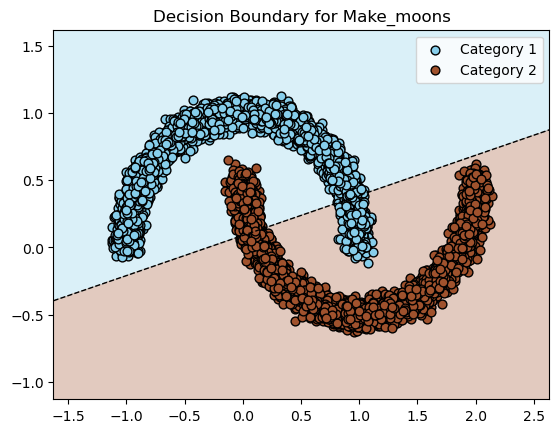

In [37]:
#Make_moons
data_moon = Make_moons(n_samples)
X_moon, y_moon = data_moon.data()
X_moon_train, X_moon_test, y_moon_train, y_moon_test = data_moon.data_split()

moon_model = LogisticRegressionModel(input_dim=X_moon.shape[1])
moon_criterion = nn.BCELoss()
moon_optimizer = optim.SGD(moon_model.parameters(), lr=0.1)

train_model(X_moon_train, y_moon_train, moon_model, moon_criterion, moon_optimizer)
train_moon_acc, test_moon_acc = test_model(X_moon_train, y_moon_train, X_moon_test, y_moon_test, moon_model)
print(f"Make_moons Train Accuracy: {train_moon_acc * 100:.2f}%")
print(f"Make_moons Test Accuracy: {test_moon_acc * 100:.2f}%")

#plot boundary decision
plot_decision_boundary(X_moon, y_moon, moon_model, "Decision Boundary for Make_moons")



Epoch [100/1000], Loss: 0.6958
Epoch [200/1000], Loss: 0.6937
Epoch [300/1000], Loss: 0.6932
Epoch [400/1000], Loss: 0.6931
Epoch [500/1000], Loss: 0.6931
Epoch [600/1000], Loss: 0.6931
Epoch [700/1000], Loss: 0.6931
Epoch [800/1000], Loss: 0.6931
Epoch [900/1000], Loss: 0.6931
Epoch [1000/1000], Loss: 0.6931
Make_circles Train Accuracy: 55.62%
Make_circles Test Accuracy: 53.80%


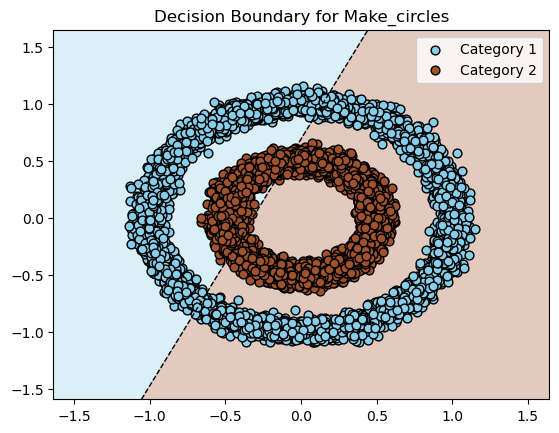

In [39]:
#Make_circles
data_circle = Make_circles(n_samples)
X_circle, y_circle =  data_circle.data()
X_circle_train, X_circle_test, y_circle_train, y_circle_test = hw.train_test_split(X_circle, y_circle, test_size=0.2)

circle_model = LogisticRegressionModel(input_dim=X_circle.shape[1])
circle_criterion = nn.BCELoss()
circle_optimizer = optim.SGD(circle_model.parameters(), lr=0.1)

train_model(X_circle_train, y_circle_train, circle_model, circle_criterion, circle_optimizer)
train_circle_acc, test_circle_acc = test_model(X_circle_train, y_circle_train, X_circle_test, y_circle_test, circle_model)
print(f"Make_circles Train Accuracy: {train_circle_acc * 100:.2f}%")
print(f"Make_circles Test Accuracy: {test_circle_acc * 100:.2f}%")

#plot boundary decision
plot_decision_boundary(X_circle, y_circle, circle_model, "Decision Boundary for Make_circles")

In [25]:
print("""We can notice that the logit model's performance is good when data is distributed in moon shape, since there is 
an obvious line that separate most of the two categories correctly. However, when data is distributed in circles, there 
is no such line that could seperate the two groups very well, so the performance of the model is worse than the former.""")

We can notice that the logit model's performance is good when data is distributed in moon shape, since there is 
an obvious line that separate most of the two categories correctly. However, when data is distributed in circles, there 
is no such line that could seperate the two groups very well, so the performance of the model is worse than the former.


### c

In [69]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        #use RELU which is nonlinear
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        return x

Epoch [100/1000], Loss: 0.0073
Epoch [200/1000], Loss: 0.0003
Epoch [300/1000], Loss: 0.0001
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Make_moons Train Accuracy: 100.00%
Make_moons Test Accuracy: 100.00%


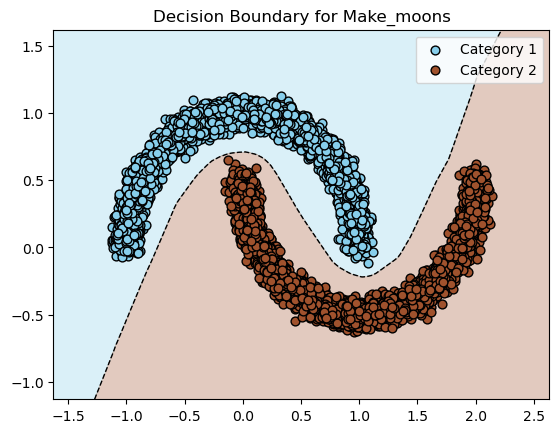

In [80]:
#make_moon data
nn_model_moon = Net(input_dim = X_moon.shape[1])
nn_criterion_moon = nn.BCELoss()
nn_optimizer_moon = torch.optim.Adam(nn_model_moon.parameters(), lr=0.001)

train_model(X_moon_train, y_moon_train, nn_model_moon, nn_criterion_moon, nn_optimizer_moon)
train_moon_acc, test_moon_acc = test_model(X_moon_train, y_moon_train, X_moon_test, y_moon_test, nn_model_moon)
print(f"Make_moons Train Accuracy: {train_moon_acc * 100:.2f}%")
print(f"Make_moons Test Accuracy: {test_moon_acc * 100:.2f}%")

# visualization
plot_decision_boundary(X_moon, y_moon, nn_model_moon, "Decision Boundary for Make_moons")

Epoch [100/1000], Loss: 0.0011
Epoch [200/1000], Loss: 0.0003
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Make_moons Train Accuracy: 100.00%
Make_moons Test Accuracy: 100.00%


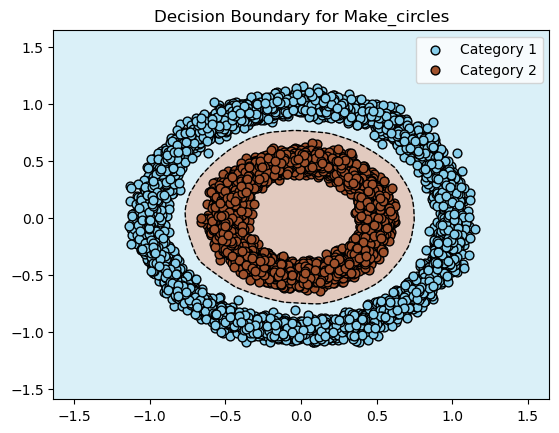

In [82]:
#make_circle data
nn_model_circle = Net(input_dim = X_circle.shape[1])
nn_criterion_circle = nn.BCELoss()
nn_optimizer_circle = torch.optim.Adam(nn_model_circle.parameters(), lr=0.001)

train_model(X_circle_train, y_circle_train, nn_model_circle, nn_criterion_circle, nn_optimizer_circle)
train_circle_acc, test_circle_acc = test_model(X_circle_train, y_circle_train, X_circle_test, y_circle_test, nn_model_circle)
print(f"Make_moons Train Accuracy: {train_circle_acc * 100:.2f}%")
print(f"Make_moons Test Accuracy: {test_circle_acc * 100:.2f}%")

# visualization
plot_decision_boundary(X_circle, y_circle, nn_model_circle, "Decision Boundary for Make_circles")

In [83]:
print('Neural network model makes much better prediction in classification, including make_moons data and make_circles data.')

Neural network model makes much better prediction in classification, including make_moons data and make_circles data.
